# Import Library

In [ ]:
# Importing Modules untuk Notebook ini
import warnings; warnings.simplefilter('ignore')
from IPython.core.display import display, HTML
import pandas as pd, matplotlib.pyplot as plt, numpy as np, seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn import model_selection
from sklearn import metrics
from sklearn import tree
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, f1_score, ConfusionMatrixDisplay
sns.set(style="ticks", color_codes=True)

# Load dataset

In [ ]:
!wget -O Data_Preprocessing_final.csv https://www.dropbox.com/s/nas9qoixof7ibhi/Data_Preprocessing_final.csv?dl=0

--2023-06-12 11:12:11--  https://www.dropbox.com/s/nas9qoixof7ibhi/Data_Preprocessing_final.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/nas9qoixof7ibhi/Data_Preprocessing_final.csv [following]
--2023-06-12 11:12:11--  https://www.dropbox.com/s/raw/nas9qoixof7ibhi/Data_Preprocessing_final.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf2a7cfc6b78ab7155b3173322d.dl.dropboxusercontent.com/cd/0/inline/B921gTH2Q3Cgi78_p0YOBoDMHgFZUJUBJhWVYXackDYijRKexC7ZCrf-YkwKlCxxpEM1Bp-Ez6dvdYofkdeni9QA1CAjN8_TaDjf1BzIeT6-0u5vl8gUYurIUosixAXAHJ3zTPh7GqxDjX7TRhqJJYZQpVYq-PyI4-PkxppV5SJ7Rg/file# [following]
--2023-06-12 11:12:11--  https://ucf2a7cfc6b78ab7155b3173322d.dl.dropboxusercontent.com/cd/0/inline/B921gTH2Q3Cgi78_p0YOBoDMHgF

In [ ]:
#menginstal paket `gdown` dan mengimpor modul `gdown` untuk untuk mengunduh file dari Google Drive menggunakan URL yang diberikan
!pip install gdown
import gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Operation cancelled by user


In [ ]:
#mengunduh file CSV dari URL menggunakan package `gdown`
url_train = 'https://drive.google.com/file/d/1qIcGwA231K8o6CaFRXU9vW_3Uh9xKSd0/view?usp=drive_link'
output_train = '/content/Data_Preprocessing_rev.csv'
gdown.download(url_train, output_train, quiet=False)

Downloading...
From: https://drive.google.com/file/d/1qIcGwA231K8o6CaFRXU9vW_3Uh9xKSd0/view?usp=drive_link
To: /content/Data_Preprocessing_rev.csv
76.1kB [00:00, 16.8MB/s]


'/content/Data_Preprocessing_rev.csv'

In [ ]:
#Menampilkan semua kolom
df = pd.read_csv('Data_Preprocessing_final.csv')
df.head()

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,REGION_RATING_CLIENT,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Security staff,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold
0,1,202500.0,406597.5,-9461,-637,-3648.0,-2120,1,0,2,...,1,0,0,0,0,0,0,0,1,0
1,0,270000.0,1293502.5,-16765,-1188,-1186.0,-291,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,67500.0,135000.0,-19046,-225,-4260.0,-2531,1,1,2,...,1,0,0,0,0,0,0,0,1,0
3,0,135000.0,312682.5,-19005,-3039,-9833.0,-2437,1,0,2,...,1,0,0,0,0,0,0,0,1,0
4,0,121500.0,513000.0,-19932,-3038,-4311.0,-3458,1,0,2,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df.shape

(297227, 64)

In [ ]:
ID = pd.read_csv('Data_id.csv')
ID.head()

,SK_ID_CURR
0,100002.0
1,100003.0
2,100004.0
3,100006.0
4,100007.0


In [ ]:
ID.shape

(297227, 1)

In [ ]:
df = pd.concat([ID, df],axis=1)
df

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Security staff,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold
0,100002.0,1,202500.0,406597.5,-9461,-637,-3648.0,-2120,1,0,...,1,0,0,0,0,0,0,0,1,0
1,100003.0,0,270000.0,1293502.5,-16765,-1188,-1186.0,-291,1,0,...,0,0,0,0,0,0,0,0,1,0
2,100004.0,0,67500.0,135000.0,-19046,-225,-4260.0,-2531,1,1,...,1,0,0,0,0,0,0,0,1,0
3,100006.0,0,135000.0,312682.5,-19005,-3039,-9833.0,-2437,1,0,...,1,0,0,0,0,0,0,0,1,0
4,100007.0,0,121500.0,513000.0,-19932,-3038,-4311.0,-3458,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297222,456251.0,0,157500.0,254700.0,-9327,-236,-8456.0,-1982,1,0,...,0,0,0,0,1,0,0,0,1,0
297223,456252.0,0,72000.0,269550.0,-20775,365243,-4388.0,-4090,0,0,...,1,0,0,0,0,0,0,0,1,0
297224,456253.0,0,153000.0,677664.0,-14966,-7921,-6737.0,-5150,1,0,...,0,1,0,0,0,0,0,0,1,0
297225,456254.0,1,171000.0,370107.0,-11961,-4786,-2562.0,-931,1,0,...,1,0,0,0,0,0,0,0,1,0


# Modelling

## Split X dan Y

In [ ]:
# Menyimpan variabel independen ke dalam variabel X
X = df.drop(['TARGET'], axis=1)
# Menyimpan variabel Target ke dalam variabel y
y = df[['TARGET']]

## Split Train set dan Test set

In [ ]:
X_train_id, X_test_id, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
X_train = X_train_id.drop(['SK_ID_CURR'], axis=1)
X_test = X_test_id.drop(['SK_ID_CURR'], axis=1)

In [ ]:
X_train.shape

(222920, 63)

In [ ]:
X_test.shape

(74307, 63)

## Feature Scaling

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Logistik Regresi

In [ ]:
# Membuat model regresi logistik dari training set
LogReg = LogisticRegression(solver='liblinear', random_state = 0)
LogReg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
# Memprediksi hasil modelnya ke test set
LogReg_pred_test = LogReg.predict(X_test)

In [ ]:
# Probabilitas mendapatkan output sebagai 0 - klien gagal bayar
LogReg.predict_proba(X_test)[:,0]

array([0.96686406, 0.91825573, 0.95396036, ..., 0.97204418, 0.63510291,
       0.83949323])

In [ ]:
# Probabilitas mendapatkan output sebagai 1 - klien tidak gagal bayar
LogReg.predict_proba(X_test)[:,1]

array([0.03313594, 0.08174427, 0.04603964, ..., 0.02795582, 0.36489709,
       0.16050677])

In [ ]:
# Cek nilai akurasi
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, LogReg_pred_test)))

Model accuracy score: 0.9204


In [ ]:
# Bandingkan akurasi train set dan test set
LogReg_pred_train = LogReg.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, LogReg_pred_train)))

Training-set accuracy score: 0.9195


In [ ]:
# Cek overfitting dan underfitting
# print nilai pada training dan test set
print('Training set score: {:.4f}'.format(LogReg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(LogReg.score(X_test, y_test)))

Training set score: 0.9195
Test set score: 0.9204


Text(0.5, 19.049999999999997, 'Predicted label')

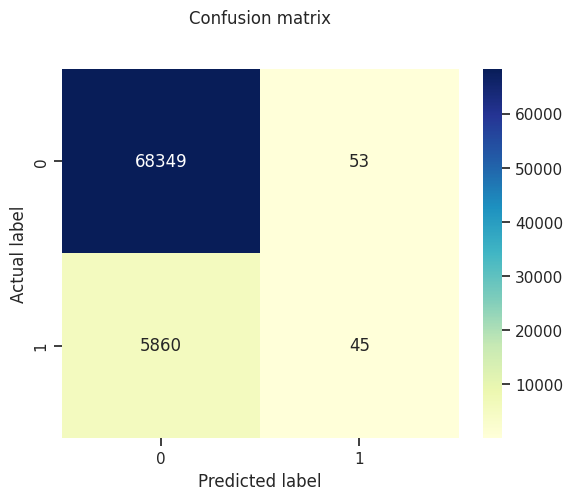

In [ ]:
# Membuat Confusion Matrix
cnf_matrix_LR = metrics.confusion_matrix(y_test, LogReg_pred_test)
p = sns.heatmap(pd.DataFrame(cnf_matrix_LR), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print(classification_report(y_test, LogReg_pred_test))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     68402
           1       0.46      0.01      0.01      5905

    accuracy                           0.92     74307
   macro avg       0.69      0.50      0.49     74307
weighted avg       0.88      0.92      0.88     74307



In [ ]:
accuracy_LR = accuracy_score(y_test, LogReg_pred_test)
f1_score_LR = f1_score(y_test, LogReg_pred_test)
recall_score_LR = recall_score(y_test, LogReg_pred_test)
precision_score_LR = precision_score(y_test, LogReg_pred_test)

print('Accuracy : {:.4f}'.format(accuracy_LR))
print('F1 Score : {:.4f}'.format(f1_score_LR))
print('Recall Score : {:.4f}'.format(recall_score_LR))
print('Precision Score : {:.4f}'.format(precision_score_LR))

Accuracy : 0.9204
F1 Score : 0.0150
Recall Score : 0.0076
Precision Score : 0.4592


In [ ]:
LogReg_pred_prob = LogReg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, LogReg_pred_prob)

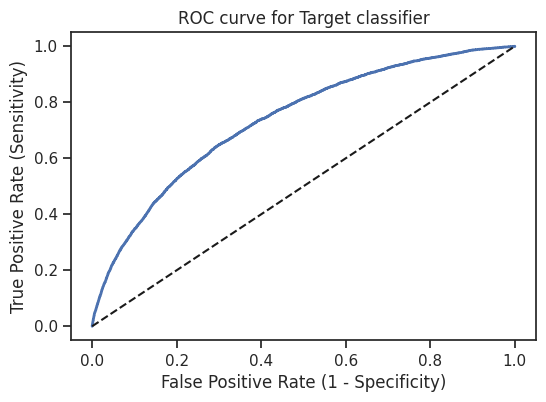

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Target classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [ ]:
ROC_AUC_LR = roc_auc_score(y_test, LogReg_pred_prob)
print('ROC AUC : {:.4f}'.format(ROC_AUC_LR))

ROC AUC : 0.7359


In [ ]:
# calculate cross-validated ROC AUC
Cross_validated_ROC_AUC_LR = cross_val_score(LogReg, X_train, y_train, cv=5, scoring='roc_auc').mean()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC_LR))

Cross validated ROC AUC : 0.7391


In [ ]:
# Applying 5-Fold Cross Validation
scores_LR = cross_val_score(LogReg, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores_LR))

Cross-validation scores:[0.91943298 0.9195227  0.91945541 0.91954513 0.91958999]


In [ ]:
# compute Average cross-validation score
print('Average cross-validation score: {:.4f}'.format(scores_LR.mean()))

Average cross-validation score: 0.9195


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'penalty':['l1','l2']},
              {'C':[1, 10, 100, 1000]}]
grid_search = GridSearchCV(estimator = LogReg,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [ ]:
# examine the best model
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}'.format(grid_search.best_score_))
# print parameters that give the best results
print('Parameters that give the best results :', (grid_search.best_params_))

GridSearch CV best score : 0.9195
Parameters that give the best results : {'penalty': 'l2'}


In [ ]:
# calculate GridSearch CV score on test set
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.9204


## K-NN

In [ ]:
# Mencari nilai k
test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)

    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [ ]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [ ]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 92.04112667716366 % and k = [14]


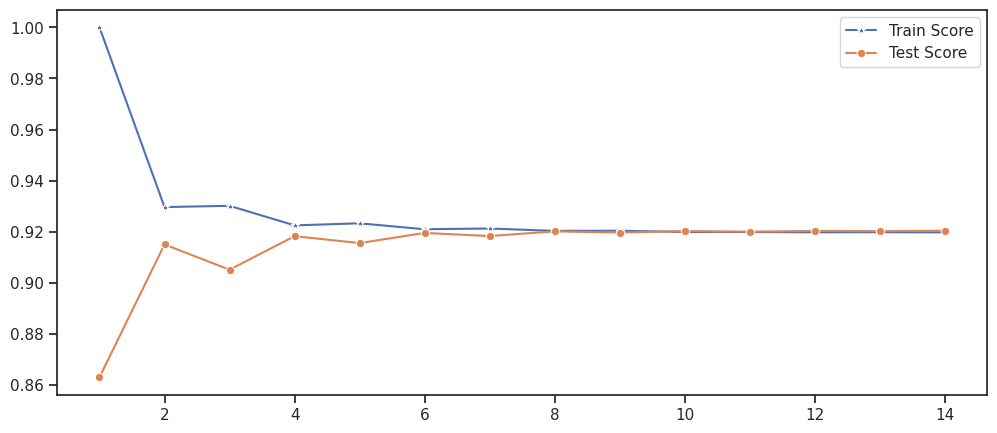

In [ ]:
plt.figure(figsize=(12,5))
p = sns.lineplot(x=range(1,15),y=train_scores,marker='*',label='Train Score')
p = sns.lineplot(x=range(1,15),y=test_scores,marker='o',label='Test Score')

In [ ]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(1)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.8630277093678926

In [ ]:
#Predicting the test set result
knn_pred = knn.predict(X_test)

Text(0.5, 19.049999999999997, 'Predicted label')

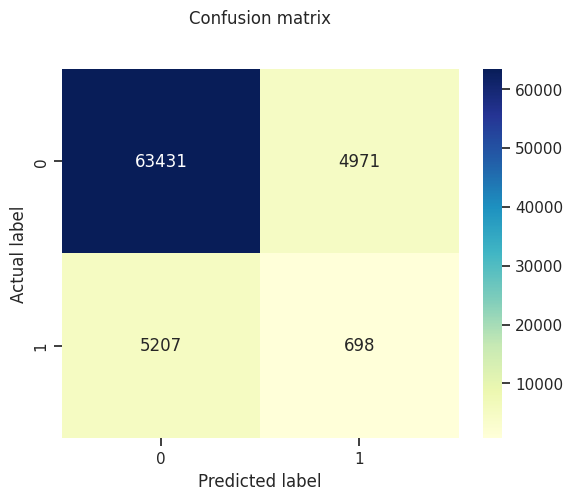

In [ ]:
cnf_matrix_knn = metrics.confusion_matrix(y_test, knn_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix_knn), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#import classification_report
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93     68402
           1       0.12      0.12      0.12      5905

    accuracy                           0.86     74307
   macro avg       0.52      0.52      0.52     74307
weighted avg       0.86      0.86      0.86     74307



In [ ]:
accuracy_KNN = accuracy_score(y_test, knn_pred)
f1_score_KNN = f1_score(y_test, knn_pred)
recall_score_KNN = recall_score(y_test, knn_pred)
precision_score_KNN = precision_score(y_test, knn_pred)

print('Accuracy : {:.4f}'.format(accuracy_KNN))
print('F1 Score : {:.4f}'.format(f1_score_KNN))
print('Recall Score : {:.4f}'.format(recall_score_KNN))
print('Precision Score : {:.4f}'.format(precision_score_KNN))

Accuracy : 0.8630
F1 Score : 0.1206
Recall Score : 0.1182
Precision Score : 0.1231


In [ ]:
knn_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, knn_pred_proba)

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=...) ROC curve')
plt.show()

In [ ]:
ROC_AUC_KNN = roc_auc_score(y_test,knn_pred_proba)
print('ROC AUC : {:.4f}'.format(ROC_AUC_KNN))

In [ ]:
# calculate cross-validated ROC AUC
Cross_validated_ROC_AUC_KNN = cross_val_score(knn, X_train, y_train, cv=5, scoring='roc_auc').mean()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC_KNN))

In [ ]:
# Applying 5-Fold Cross Validation
scores_KNN = cross_val_score(knn, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores_KNN))

In [ ]:
# compute Average cross-validation score
print('Average cross-validation score: {:.4f}'.format(scores_KNN.mean()))

In [ ]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

## Decision Tree

In [ ]:
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
decisiontree_pred = decisiontree.predict(X_test)

Text(0.5, 19.049999999999997, 'Predicted label')

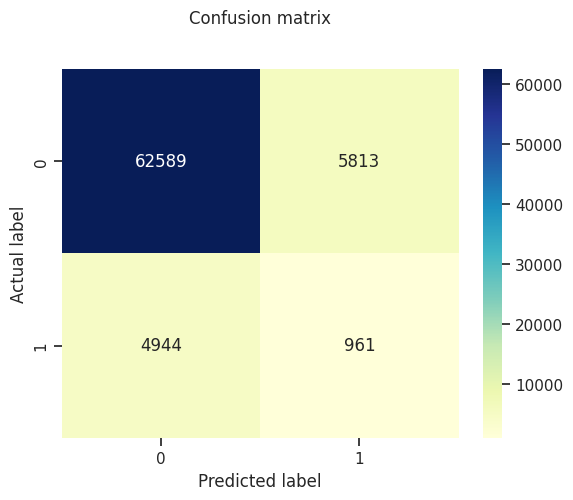

In [ ]:
cnf_matrix_DT = metrics.confusion_matrix(y_test, decisiontree_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix_DT), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print(classification_report(y_test,decisiontree_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92     68402
           1       0.14      0.16      0.15      5905

    accuracy                           0.86     74307
   macro avg       0.53      0.54      0.54     74307
weighted avg       0.86      0.86      0.86     74307



In [ ]:
accuracy_DT = accuracy_score(y_test, decisiontree_pred)
f1_score_DT = f1_score(y_test, decisiontree_pred)
recall_score_DT = recall_score(y_test, decisiontree_pred)
precision_score_DT = precision_score(y_test, decisiontree_pred)

print('Accuracy : {:.4f}'.format(accuracy_DT))
print('F1 Score : {:.4f}'.format(f1_score_DT))
print('Recall Score : {:.4f}'.format(recall_score_DT))
print('Precision Score : {:.4f}'.format(precision_score_DT))

Accuracy : 0.8552
F1 Score : 0.1516
Recall Score : 0.1627
Precision Score : 0.1419


In [ ]:
decisiontree_pred_prob = decisiontree.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, decisiontree_pred_prob)

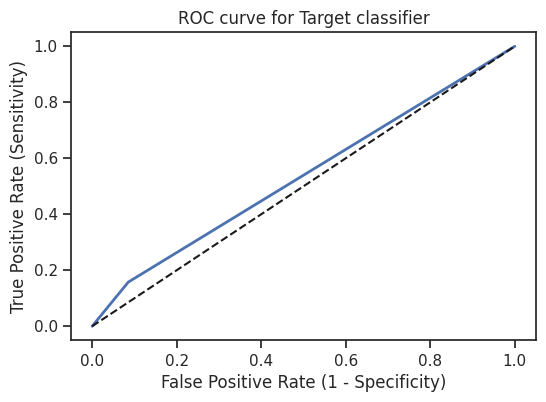

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Target classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [ ]:
ROC_AUC_DT = roc_auc_score(y_test, decisiontree_pred_prob)
print('ROC AUC : {:.4f}'.format(ROC_AUC_DT))

ROC AUC : 0.5361


In [ ]:
# calculate cross-validated ROC AUC
Cross_validated_ROC_AUC_DT = cross_val_score(decisiontree, X_train, y_train, cv=5, scoring='roc_auc').mean()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC_DT))

Cross validated ROC AUC : 0.5355


In [ ]:
# Applying 5-Fold Cross Validation
scores_DT = cross_val_score(decisiontree, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores_DT))

Cross-validation scores:[0.85154123 0.8522796  0.8522521  0.85508442 0.85120717]


In [ ]:
# compute Average cross-validation score
print('Average cross-validation score: {:.4f}'.format(scores_DT.mean()))

Average cross-validation score: 0.8525


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [2, 4, 6, 8],
}
decisiontree_cv = GridSearchCV(DecisionTreeClassifier(),
                    cv=5,scoring='roc_auc',param_grid=param_grid)
decisiontree_cv.fit(X_train, y_train)

print("Best Score:" + str(decisiontree_cv.best_score_))
print("Best Parameters: " + str(decisiontree_cv.best_params_))

Best Score:0.7090249747126357
Best Parameters: {'max_depth': 8}


## Random Forest

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
random_forest_pred = random_forest.predict(X_test)

Text(0.5, 19.049999999999997, 'Predicted label')

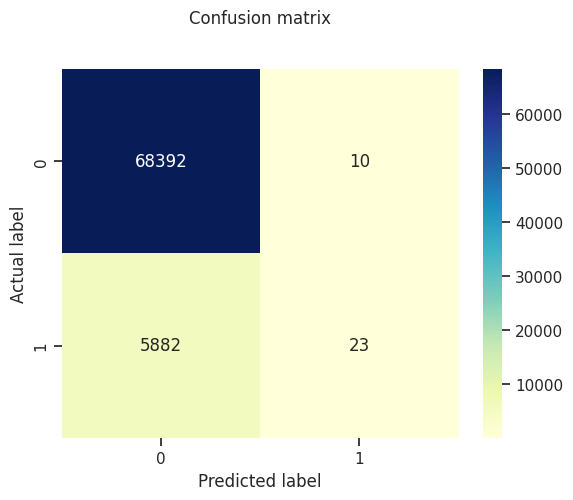

In [ ]:
cnf_matrix_RF = metrics.confusion_matrix(y_test, random_forest_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix_RF), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print(classification_report(y_test,random_forest_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     68402
           1       0.70      0.00      0.01      5905

    accuracy                           0.92     74307
   macro avg       0.81      0.50      0.48     74307
weighted avg       0.90      0.92      0.88     74307



In [ ]:
accuracy_RF = accuracy_score(y_test, random_forest_pred)
f1_score_RF = f1_score(y_test, random_forest_pred)
recall_score_RF = recall_score(y_test, random_forest_pred)
precision_score_RF = precision_score(y_test, random_forest_pred)

print('Accuracy : {:.4f}'.format(accuracy_RF))
print('F1 Score : {:.4f}'.format(f1_score_RF))
print('Recall Score : {:.4f}'.format(recall_score_RF))
print('Precision Score : {:.4f}'.format(precision_score_RF))

Accuracy : 0.9207
F1 Score : 0.0077
Recall Score : 0.0039
Precision Score : 0.6970


In [ ]:
random_forest_pred_prob = random_forest.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, random_forest_pred_prob)

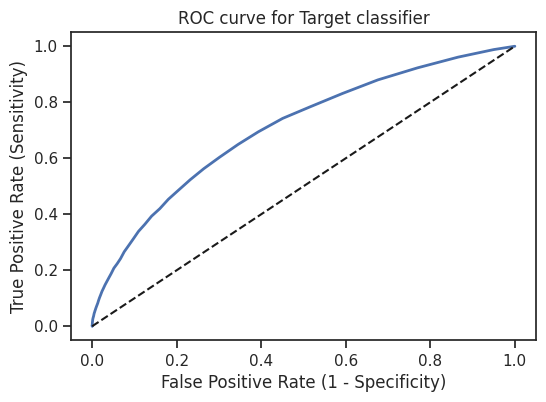

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Target classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
ROC_AUC_RF = roc_auc_score(y_test, random_forest_pred_prob)
print('ROC AUC : {:.4f}'.format(ROC_AUC_RF))

ROC AUC : 0.7057


In [ ]:
# calculate cross-validated ROC AUC
Cross_validated_ROC_AUC_RF = cross_val_score(random_forest, X_train, y_train, cv=5, scoring='roc_auc').mean()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC_RF))

Cross validated ROC AUC : 0.6978


In [ ]:
# Applying 5-Fold Cross Validation
scores_RF = cross_val_score(random_forest, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores_RF))

Cross-validation scores:[0.92006489 0.92028268 0.91978771 0.91978771 0.91976022]


In [ ]:
# compute Average cross-validation score
print('Average cross-validation score: {:.4f}'.format(scores_RF.mean()))

Average cross-validation score: 0.9199


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': np.arange(3, 6),
}
random_forest_cv = GridSearchCV(RandomForestClassifier(), cv=5, param_grid=param_grid)
random_forest_cv.fit(X_train, y_train)

print("Best Score:" + str(random_forest_cv.best_score_))
print("Best Parameters: " + str(random_forest_cv.best_params_))

Best Score:0.9200851341093659
Best Parameters: {'max_depth': 3}


## XGB Classifier

In [ ]:
# hyperparameter tuning in XGBoost
def tune_hyperparameters(clf, param_grid, X_train, y_train):
    """
    This function tunes the hyperparameters of a classifier using GridSearchCV and cross-validation
    and returns the best classifier model with the optimal hyperparameters.
    """

    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    print("Best hyperparameters:\n", clf_grid.best_params_)

    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_

In [ ]:
# Define the hyperparameter grid to search
xgb_param_grid = {
    'max_depth': [5, 6, 7],
    'learning_rate': [0.04, 0.05, 0.06],
    'n_estimators': [150, 200, 250],
    'min_child_weight': [2, 3, 4],
    'scale_pos_weight': [0.2, 0.5, 0.8],
    'subsample': [0.8, 0.9, 1],
    'colsample_bytree': [0.3, 0.5, 0.8],
    'colsample_bylevel': [0.7, 0.8, 0.9],
    'reg_alpha': [0.01, 0.05, 0.1],
    'reg_lambda': [0.05, 0.1, 0.2],
    'max_delta_step': [1, 2, 3],
    'gamma': [0, 0.1, 0.2]
}

In [ ]:
# Initialize the XGBoost Classifier using optimal hyperparameters
xgb_opt = XGBClassifier(max_depth=6,
                        learning_rate=0.05,
                        n_estimators=200,
                        min_child_weight=2,
                        scale_pos_weight=0.5,
                        subsample=0.9 ,
                        colsample_bytree=0.5,
                        colsample_bylevel=0.8 ,
                        reg_alpha=0.05 ,
                        reg_lambda=0.1 ,
                        max_delta_step=2 ,
                        gamma=0.1,
                        random_state=0)

# Train the XGBoost classifier
xgb_opt.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.8, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=2,
              max_depth=6, max_leaves=None, min_child_weight=2, missing=nan,
              monotone_constraints=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=0, ...)

In [ ]:
# XGBoost Model Evaluation
def metrics_calculator(clf, X_test, y_test, model_name):
    '''
    This function calculates all desired performance metrics for a given model on test data.
    '''
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='macro'),
                                recall_score(y_test, y_pred, average='macro'),
                                f1_score(y_test, y_pred, average='macro'),
                                roc_auc_score(y_test, clf.predict_proba(X_test)[::,1], average='macro')],
                          index=['Accuracy','Macro Precision','Macro Recall','Macro F1-score','Macro AUC'],
                          columns = [model_name])

    result = (result * 100).round(2).astype(str) + '%'
    return result

In [ ]:
def model_evaluation(clf, X_train, X_test, y_train, y_test, model_name):
    '''
    This function provides a complete report of the model's performance including classification reports and confusion matrix
    '''
    # Set font scale
    sns.set(font_scale=1.5)

    # Generate classification report for training set
    y_pred_train = clf.predict(X_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))

    # Generate classification report for test set
    y_pred_test = clf.predict(X_test)
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))
    print('\n')

    # Create figure and subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, dpi=90, figsize=(12, 5))

    # Plot confusion matrix for test set
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, colorbar=False, cmap='Purples', ax=ax1)
    ax1.set_title('Confusion Matrix for Test Data')
    ax1.grid(False)

    # Report desired results as a summary in the form of a table
    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax2.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 3.6)
    table.set_fontsize(12)
    ax2.axis('tight')
    # Hide the axes
    ax2.axis('off')
    # set the title
    ax2.set_title('{} Performance Summary on Test Data'.format(model_name), fontsize=18)
    # Modify color
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('purple')

    plt.tight_layout()
    plt.show()

In [ ]:
# Initialize the XGBoost Classifier using optimal hyperparameters
xgb_final = XGBClassifier(max_depth=6,
                          learning_rate=0.05,
                          n_estimators=200,
                          min_child_weight=2,
                          scale_pos_weight=0.5,
                          subsample=0.9 ,
                          colsample_bytree=0.5,
                          colsample_bylevel=0.8 ,
                          reg_alpha=0.05 ,
                          reg_lambda=0.1 ,
                          max_delta_step=2 ,
                          gamma=0.1,
                          random_state=0)

# Train the model on the whole dataset
xgb_final.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.8, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=2,
              max_depth=6, max_leaves=None, min_child_weight=2, missing=nan,
              monotone_constraints=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=0, ...)


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    204997
           1       0.92      0.00      0.01     17923

    accuracy                           0.92    222920
   macro avg       0.92      0.50      0.48    222920
weighted avg       0.92      0.92      0.88    222920


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     68402
           1       0.81      0.00      0.00      5905

    accuracy                           0.92     74307
   macro avg       0.87      0.50      0.48     74307
weighted avg       0.91      0.92      0.88     74307





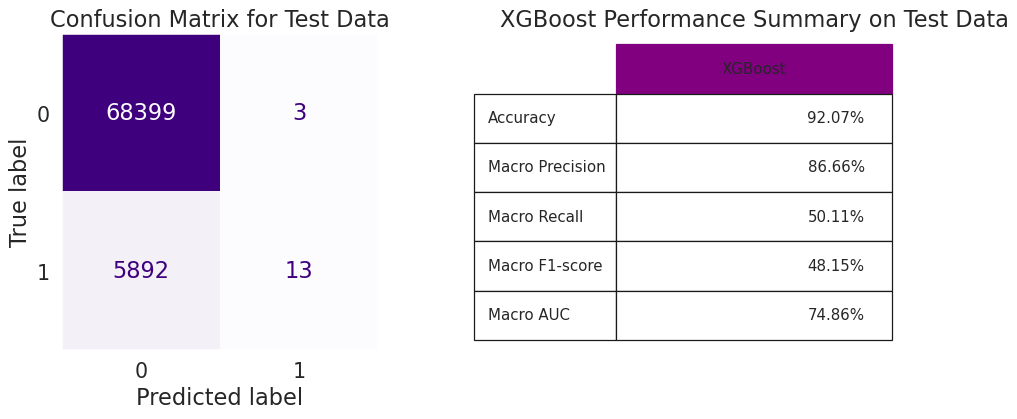

In [ ]:
model_evaluation(xgb_final, X_train, X_test, y_train, y_test, 'XGBoost')

In [ ]:
# Target prediction for test.csv samples using relavant features
xgb_pred = xgb_final.predict(X_test)

In [ ]:
accuracy_XGB = accuracy_score(y_test, xgb_pred)
f1_score_XGB = f1_score(y_test, xgb_pred)
recall_score_XGB = recall_score(y_test, xgb_pred)
precision_score_XGB = precision_score(y_test, xgb_pred)

print('Accuracy : {:.4f}'.format(accuracy_XGB))
print('F1 Score : {:.4f}'.format(f1_score_XGB))
print('Recall Score : {:.4f}'.format(recall_score_XGB))
print('Precision Score : {:.4f}'.format(precision_score_XGB))

Accuracy : 0.9207
F1 Score : 0.0044
Recall Score : 0.0022
Precision Score : 0.8125


In [ ]:
xgb_pred_prob = xgb_final.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, xgb_pred_prob)

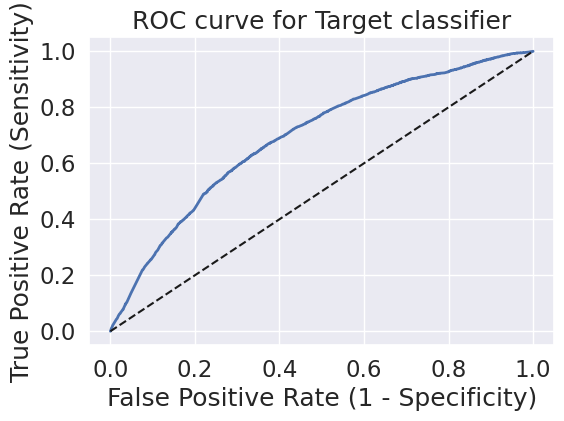

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Target classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [ ]:
ROC_AUC_XGB = roc_auc_score(y_test, xgb_pred_prob)
print('ROC AUC : {:.4f}'.format(ROC_AUC_XGB))

ROC AUC : 0.6931


In [ ]:
# calculate cross-validated ROC AUC
Cross_validated_ROC_AUC_XGB = cross_val_score(xgb_final, X_train, y_train, cv=5, scoring='roc_auc').mean()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC_XGB))

Cross validated ROC AUC : 0.7325


In [ ]:
# Applying 5-Fold Cross Validation
scores_XGB = cross_val_score(xgb_final, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores_XGB))

Cross-validation scores:[0.92006489 0.92020019 0.92009019 0.92025518 0.92017269]


In [ ]:
# compute Average cross-validation score
print('Average cross-validation score: {:.4f}'.format(scores_XGB.mean()))

Average cross-validation score: 0.9202


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': np.arange(3, 6),
}
xgb_final_cv = GridSearchCV(XGBClassifier(), cv=5, param_grid=param_grid)
xgb_final_cv.fit(X_train, y_train)

print("Best Score:" + str(xgb_final_cv.best_score_))
print("Best Parameters: " + str(xgb_final_cv.best_params_))

Best Score:0.9201401309882767
Best Parameters: {'max_depth': 3}


# Evaluasi Model Keseluruhan

In [ ]:
models = pd.DataFrame(columns=["Model","Accuracy","F1 Score","Recall Score","Precision Score"])

In [ ]:
Logistic_Regresi = {"Model": "LogisticRegression", "Accuracy": accuracy_LR, "F1 Score": f1_score_LR, "Recall Score": recall_score_LR, "Precision Score": precision_score_LR}
models = models.append(Logistic_Regresi, ignore_index=True)

In [ ]:
KNN = {"Model": "KNeighborsClassifier", "Accuracy": accuracy_KNN, "F1 Score": f1_score_KNN, "Recall Score": recall_score_KNN, "Precision Score": precision_score_KNN}
models = models.append(KNN, ignore_index=True)

In [ ]:
Decision_Tree = {"Model": "DecisionTreeClassifier", "Accuracy": accuracy_DT, "F1 Score": f1_score_DT, "Recall Score": recall_score_DT, "Precision Score": precision_score_DT}
models = models.append(Decision_Tree, ignore_index=True)

In [ ]:
Random_Forest = {"Model": "RandomForestClassifier", "Accuracy": accuracy_RF, "F1 Score": f1_score_RF, "Recall Score": recall_score_RF, "Precision Score": precision_score_RF}
models = models.append(Random_Forest, ignore_index=True)

In [ ]:
XGB = {"Model": "XGBClassifier", "Accuracy": accuracy_XGB, "F1 Score": f1_score_XGB, "Recall Score": recall_score_XGB, "Precision Score": precision_score_XGB}
models = models.append(XGB, ignore_index=True)

In [ ]:
models.sort_values(by="Recall Score")

,Model,Accuracy,F1 Score,Recall Score,Precision Score
4,XGBClassifier,0.920667,0.004391,0.002202,0.812500
3,RandomForestClassifier,0.920707,0.007747,0.003895,0.696970
0,LogisticRegression,0.920425,0.014993,0.007621,0.459184
1,KNeighborsClassifier,0.863028,0.120615,0.118205,0.123126
2,DecisionTreeClassifier,0.855236,0.151589,0.162743,0.141866


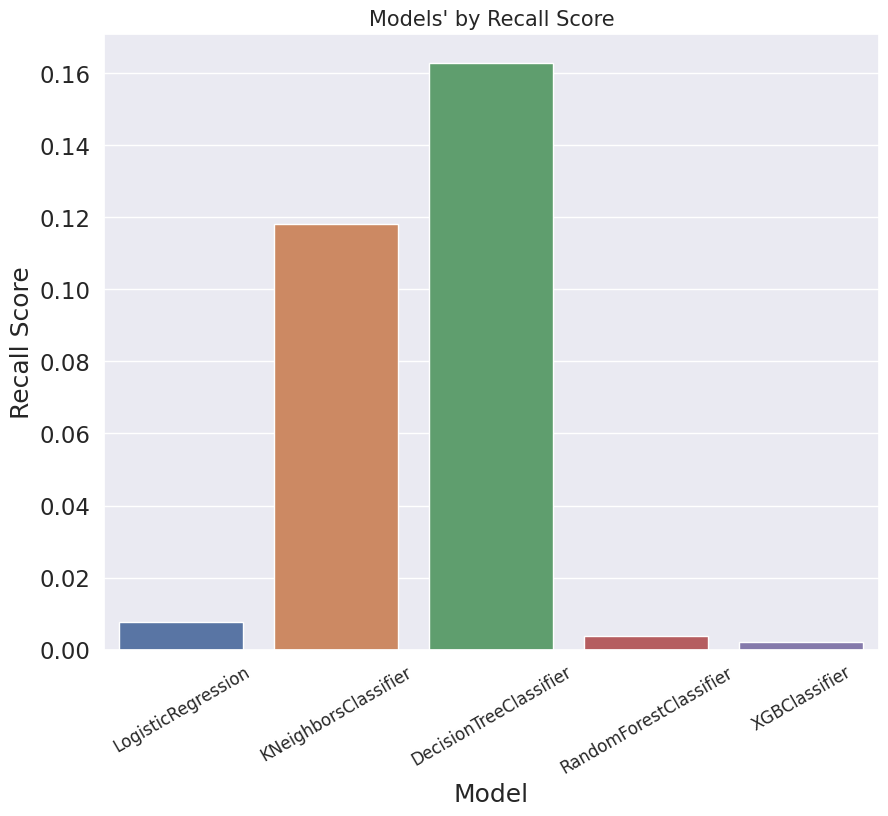

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x=models["Model"], y=models["Recall Score"])
plt.title("Models' by Recall Score", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

# Prediksi & Export Data

In [ ]:
X1 = X.drop(['SK_ID_CURR'], axis=1)

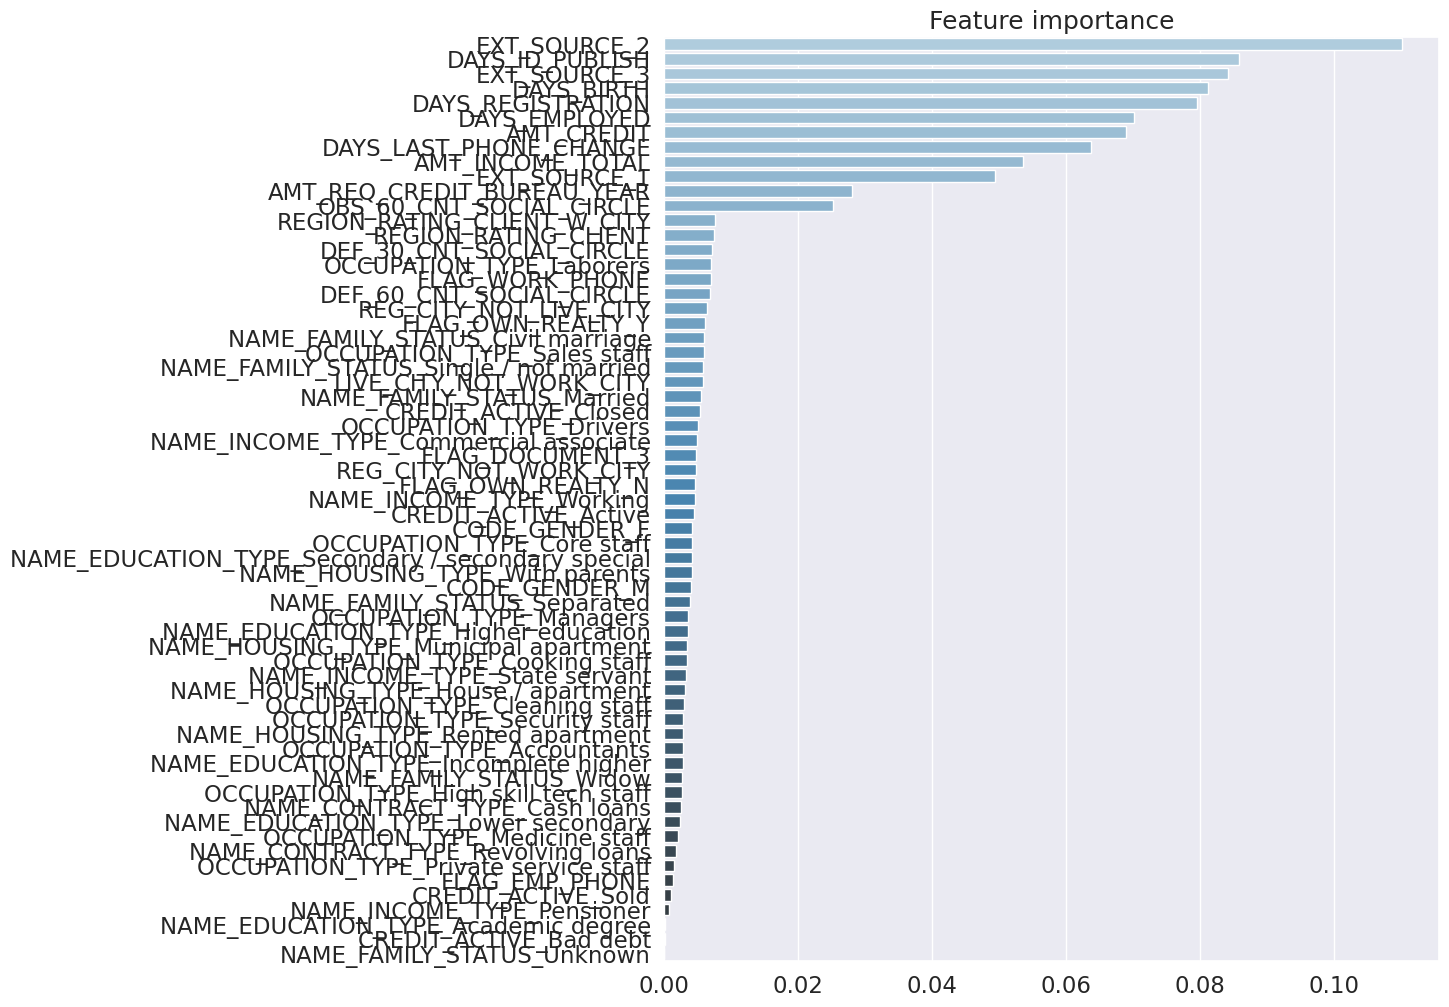

In [ ]:
# Plot features importances
imp = pd.Series(data=decisiontree.feature_importances_, index=X1.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

In [ ]:
predict = pd.Series(decisiontree.predict(X_test), name = "TARGET").astype(int)
results = pd.concat([X_test_id['SK_ID_CURR'], predict],axis = 1)

In [ ]:
results.tail(5)

,SK_ID_CURR,TARGET
74301,NaN,1.0
74302,NaN,0.0
74303,NaN,1.0
74305,NaN,0.0
74306,NaN,0.0


In [ ]:
results.nunique()

SK_ID_CURR    60698
TARGET            2
dtype: int64

In [ ]:
# results.to_csv(f'Data_Preprocessing_Prediksi_Final.csv', index=False)